# Flajolet Martin Algorithm

In [1]:
L = 64
PHI = 1  # 0.77351

In [2]:
import matplotlib.pyplot as plt

def plot(x, y1, y2):
    plt.ylabel('Count Distinct')
    plt.plot(range(len(y1)), y1, label = "Count Distinct (True)")
    plt.plot(range(len(y1)), y2, label = "Count Distinct (FM)")

    plt.axes().get_xaxis().set_visible(False)
    
    plt.legend()
    plt.show()

In [3]:
import math

def get_rightmost_set_bit(n: int) -> int:
    if n == 0:
        return L
    return int(math.log2(n & -n) + 1) - 1


def get_rightmost_unset_bit(n: int) -> int:
    return get_rightmost_set_bit(~n)


def set_bit(n: int, pos: int) -> int:
    return n | 1 << pos

In [4]:
import random


def generate_random_stream(total_distinct: int):
    values = list(range(total_distinct))
    while True:
        yield random.choice(values)

In [5]:
def count_distinct_true(stream) -> int:
    return len(set(stream))

In [6]:
import hashlib

def hash_fn(m: int, n: int, x: int, L: int) -> int:
    return (m*x + n) % (2 ** L)

In [7]:
get_rightmost_set_bit(8)

3

In [8]:
get_rightmost_unset_bit(5)

1

In [9]:
def count_distinct_fm(stream) -> int:
    params = []
    for _ in range(7):
        params.append((2 * random.randint(0, 5) + 1, 2 * random.randint(0, 5) + 1))

    estimates = []
    for m, n in params:
        vector, b = 0, 0
        for x in stream:
            y = hash_fn(m, n, x, L)
            i = get_rightmost_set_bit(y)
            vector = set_bit(vector, i)

        b = get_rightmost_unset_bit(vector)
        estimates.append(math.ceil((2 ** b) / PHI))
    return sum(estimates) / len(estimates)

/Users/arpitbhayani/myw/flajolet-martin/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


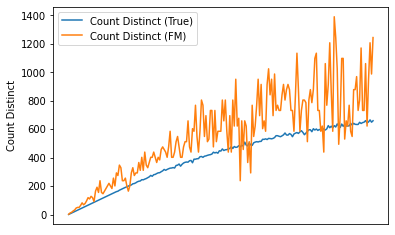

In [10]:
y1, y2 = [], []

total_distincts = range(1, 1024, 5)

for true_distinct in total_distincts:
    stream_gen = generate_random_stream(true_distinct)
    stream = [next(stream_gen) for _ in range(1048)]

    y1.append(count_distinct_true(stream))
    y2.append(count_distinct_fm(stream))

plot(total_distincts, y1, y2)

In [11]:
import re

with open('./jungle-book.txt', 'r') as f:
    text = re.sub('[^a-zA-Z0-9 \n\.]', '', f.read())
    tokens = text.split()

In [12]:
len(tokens), len(set(tokens))

(53850, 7150)

In [13]:
tokens_hashed = [int(hashlib.md5(token.encode()).hexdigest(), 16) % (2 ** L) for token in tokens]
count_distinct_fm(tokens_hashed)

7606.857142857143